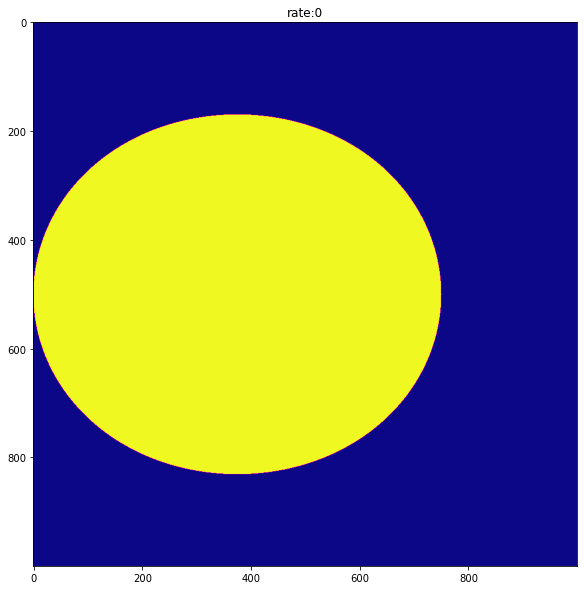

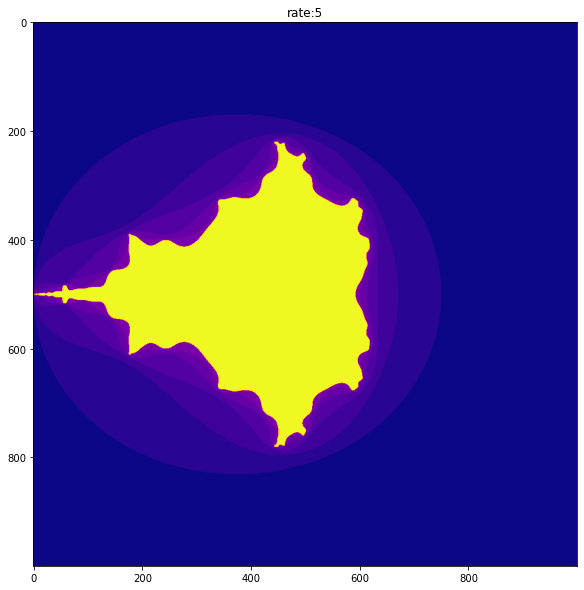

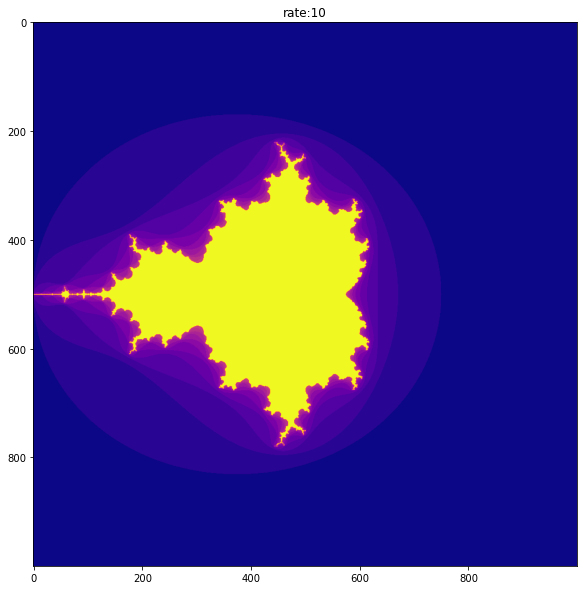

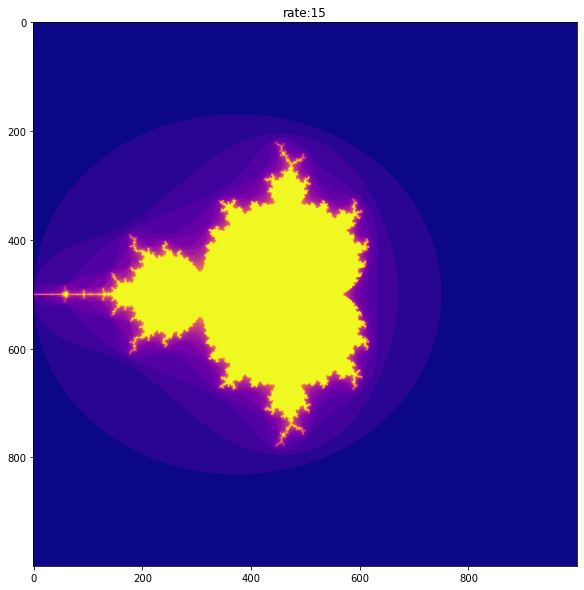

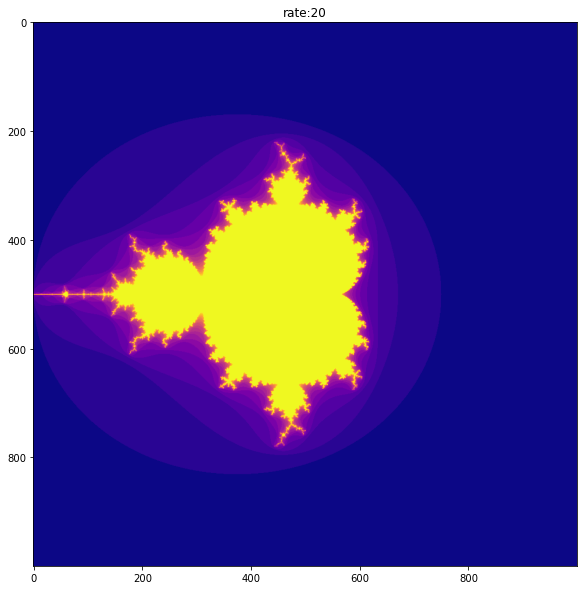

In [8]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

n = 1000
y, x = np.ogrid[-2:2:(4/n), -2:2:(4/n)]
# ogridは1次元グリッド。a:b:cで、aからbまでc毎、という意味
# https://qiita.com/supersaiakujin/items/4410efe5dc81982ef208
c = x + y * 1j
# numpy で1jは1虚数単位
# これでyレンジ, xレンジを細かくしたメッシュグリッドを複素平面上に作った

rate = 21
z = c
times = rate + np.zeros(z.shape, dtype=int)
# np.zerosでn*nのゼロ行列を作り、その全要素をrateとする。たとえばrate=5なら全要素5のn*n行列
for i in range(rate):
    # 以下zはn*n行列の個数だけある
    z = z**2 + c
    # マンデルブロ漸化式
    diverge = z*np.conj(z) > 2**2
    # z*共役複素数conjugate、つまりz絶対値の2乗、が2**2より大きければTrue 1、そうでなければFalse 0
    div = diverge & (times==rate)
    # timesとrateが同じところはTrue、それとdivergeのAND、つまり両方1の時は1、をn*n行列の全要素で調べる
    # なぜかi=0のときだけは違う動き
    times[div] = i
    # times行列の[div=True]のところはiを代入
    z[diverge] = 2
    #print('diverge', diverge)
    #print('times==rate', times==rate)
    #print('div', div)
    #print('times', times)

    if i%5 == 0:
        plt.figure(figsize=(10,10))
        plt.imshow(times, cmap="plasma")
        plt.title('rate:' + str(i))
        plt.show()

In [ ]:
print(times[40:50])

In [ ]:
# test
d = True
t = 0
r = 1
di = d & (t==r)
print(di)

In [ ]:
# http://www.otupy.net/archives/36692951.html
# https://qiita.com/jabberwocky0139/items/33add5b3725204ad377f
# https://realpython.com/mandelbrot-set-python/